##Preamble:
Load seaborn for pretty plots

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

%matplotlib inline
sns.set_palette('muted')
sns.set_style('darkgrid')

##Load the data:
stim is a 60000-element array containing the stimulus time-series. Similarly, rho is a 60000-element binary array denoting whether or not a spike was recorded in that time bin. The sampling rate for this experiment was 500Hz, i.e. 2ms sampling period.  

In [2]:
FILENAME = 'c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)
    
stim = data['stim']
rho = data['rho']

##Let's look at the data:
It's always good to look at the data to see what we're dealing with. Let's plot the first 100 elements of each timeseries.

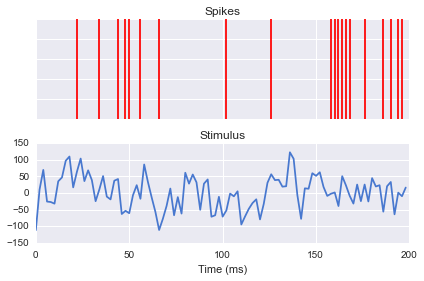

In [3]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

time = np.arange(0,100) * 2

# ax1.plot(time,rho[time])
spikes=time[rho[time].astype(bool)]
ax1.vlines(spikes,0,1,color='r')
ax1.set_yticklabels([])
ax1.set_title('Spikes')


ax2.plot(time,stim[time])
ax2.set_xlabel('Time (ms)')
ax2.set_title('Stimulus')
f.tight_layout()

##Function to compute spike triggered average
The spike triggered average is the average stimulus preceding the response of a neuron. Here we will look at the 300ms window preceeding each spike of the neuron and take the average of all computed windows. 

In [4]:
def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for specified number of timesteps before spike"""
    
    sta = np.zeros((num_timesteps,))

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps

    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.
    num_spikes = np.sum(rho[spike_times])
    
    print "Number of spikes is " + repr(num_spikes)
    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    
    for iter in xrange(num_spikes): #iterate through each spike
        current_time = spike_times[iter] #find current time of this spike
        # create 300ms (150 time step) window preceding spike
        window_range = np.arange(current_time-num_timesteps,current_time)
        temp=stim[window_range] #take the stimulus preceding the spike with our defined window
        sta+=temp #add it to sta
        
    sta/=num_spikes #divide by total number of spikes to average
    return sta

##Compute the STA:
Call the above-defined function to compute the spike triggered average. 

Number of spikes is 53583


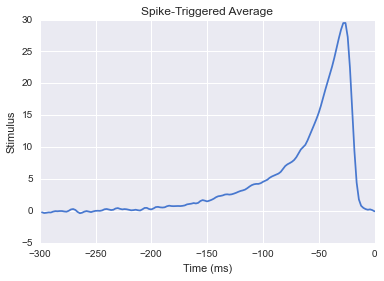

In [5]:
# Fill in these values
sampling_period = 2 # in ms
num_timesteps = 150 # we want 300 ms window, so this means 150 time steps * 2ms

sta = compute_sta(stim, rho, num_timesteps)

time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

sns.plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

The computed spike triggered average shows that the recorded cell is a leaky integrate-and-fire neuron. The stimulus value at the time step immediately prior to the spike (plus some small temporal latency) has the highest weight, whereas the weights before that decay as we move farther from spike onset. We also note that the stimulus is always positive. 
